In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def f(x):
    if x >= 0:
        return np.exp(np.sqrt(x))
    return 0
f_v = np.vectorize(f)

In [46]:
N = 1000
d = 10.0 / (N-1)
X = np.linspace(0,10,N)
Y = f_v(X)
# plt.scatter(X,Y)

# integracion: metodo inf, sup y trapecio

In [47]:
w = np.zeros(N)
w = w + 1
w[N-1] = 0
print("Area Metodo INF:",d*np.dot(w,Y))

Area Metodo INF: 104.05136169743453


In [48]:
w = np.zeros(N)
w = w + 1
w[0] = 0
print("Area Metodo SUP:",d*np.dot(w,Y))

Area Metodo SUP: 104.27783159655384


In [49]:
w = np.zeros(N)
w = w + 1
w[0] = 1/2
w[N-1] = 1/2
print("Area Metodo trapecio:",d*np.dot(w,Y))

Area Metodo trapecio: 104.16459664699418


In [51]:
sp.integrate.trapezoid(y=Y, x=X)

104.16459664699418

In [52]:
sp.integrate.simpson(y=Y, x=X)

104.16465325000541

$$I_n=\int_0^{10}x^ndx = \frac{10^{n+1}}{n+1}$$

# Gaussian Quadrature

## Vandermonde Matrix

In [39]:
X = np.array([0,1/4,-2/5,1/2,-1/7,-1/2,9/10,1/10])

In [42]:
V = np.matrix([X**0, X**1, X**2, X**3, X**4, X**5, X**6, X**7]) # det... (x0-x1)(x0-x2)(x0-x3)...(x1-x2)(x1-x3)....()
V

matrix([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00],
        [ 0.00000000e+00,  2.50000000e-01, -4.00000000e-01,
          5.00000000e-01, -1.42857143e-01, -5.00000000e-01,
          9.00000000e-01,  1.00000000e-01],
        [ 0.00000000e+00,  6.25000000e-02,  1.60000000e-01,
          2.50000000e-01,  2.04081633e-02,  2.50000000e-01,
          8.10000000e-01,  1.00000000e-02],
        [ 0.00000000e+00,  1.56250000e-02, -6.40000000e-02,
          1.25000000e-01, -2.91545190e-03, -1.25000000e-01,
          7.29000000e-01,  1.00000000e-03],
        [ 0.00000000e+00,  3.90625000e-03,  2.56000000e-02,
          6.25000000e-02,  4.16493128e-04,  6.25000000e-02,
          6.56100000e-01,  1.00000000e-04],
        [ 0.00000000e+00,  9.76562500e-04, -1.02400000e-02,
          3.12500000e-02, -5.94990183e-05, -3.12500000e-02,
          5.90490000e-01,  1.00000000e-05],
        [ 0.0000

$$I_n=\int_{-1}^{1}x^ndx = \frac{1-(-1)^{n+1}}{n+1}$$

In [45]:
def In(n):
    return (1-(-1)**(n+1))/(n+1)
I = np.matrix([In(i) for i in range(8)]).T
I

matrix([[2.        ],
        [0.        ],
        [0.66666667],
        [0.        ],
        [0.4       ],
        [0.        ],
        [0.28571429],
        [0.        ]])

In [47]:
def P(x):
    #return x**3-x**2+x-1
    return np.cos(x*np.pi/2)
vecP = np.vectorize(P)
vP = np.matrix(vecP(X)).T
vP

matrix([[1.        ],
        [0.92387953],
        [0.80901699],
        [0.70710678],
        [0.97492791],
        [0.70710678],
        [0.15643447],
        [0.98768834]])

In [49]:
4/np.pi

1.2732395447351628

In [48]:
print('The integration of P(x) is:', (vP.T*(np.linalg.inv(V)*I))[0,0])

The integration of P(x) is: 1.2731505138432624


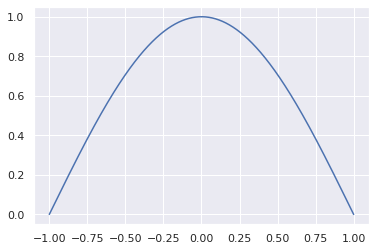

In [50]:
_x = np.linspace(-1,1,1000)
_y = vecP(_x)
plt.plot(_x,_y)

In [52]:
np.linalg.inv(V)*I # -> como evitar tanta variabilidad

matrix([[-3.43438095e+02],
        [-7.44016143e+01],
        [-5.10155008e+01],
        [ 6.71175779e+00],
        [ 1.56554506e+02],
        [ 2.27215117e+01],
        [ 9.65825659e-02],
        [ 2.84770853e+02]])

In [54]:
RL = sp.special.roots_legendre(10)

In [58]:
X = RL[0]
w = RL[1]

In [60]:
print('The integration of P(x) is:', np.dot(w,vecP(X)))

The integration of P(x) is: 1.2732395447351645


In [61]:
4/np.pi

1.2732395447351628